In [1]:
import os
import timecorr as tc
import hypertools as hyp
import numpy as np
import pandas as pd
from scipy.io import loadmat
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
import timecorr as tc
from timecorr.helpers import isfc, wisfc, mean_combine, corrmean_combine


In [2]:
datadir = '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/data'

In [3]:
pieman_data = loadmat(os.path.join(datadir, 'pieman_ica100.mat'))
pieman_conds = ['intact', 'paragraph', 'word', 'rest']

In [4]:
debug = True

In [5]:
if debug:
    data = []
    conds = []
    for c in pieman_conds:
        next_data = list(map(lambda i: pieman_data[c][:, i][0][:2000,:100], np.arange(4)))
        data.extend(next_data)
        conds.extend([c]*len(next_data))
    del pieman_data

else:

    data = []
    conds = []
    for c in pieman_conds:
        next_data = list(map(lambda i: pieman_data[c][:, i][0], np.arange(pieman_data[c].shape[1])))
        data.extend(next_data)
        conds.extend([c]*len(next_data))
    del pieman_data

In [6]:
data = np.array(data)
conds = np.array(conds)

In [7]:
intact = hyp.describe(list(data[conds == 'intact']), reduce='PCA', show=False)
paragraph = hyp.describe(list(data[conds == 'paragraph']), reduce='PCA', show=False)
word = hyp.describe(list(data[conds == 'word']), reduce='PCA', show=False)
rest = hyp.describe(list(data[conds == 'rest']), reduce='PCA', show=False)

/usr/local/lib/python3.6/site-packages/hypertools/tools/describe.py:61: UserWarning: When input data is large, this computation can take a long time.
  warnings.warn('When input data is large, this computation can take a long time.')


In [8]:
pca_pd = pd.DataFrame({'intact':intact['average'],'paragraph':paragraph['average'],'word':word['average'],'rest':rest['average']})


In [9]:
pca_pd.head()

,intact,paragraph,word,rest
0,0.721251,0.549193,0.703682,0.682624
1,0.792741,0.676352,0.746399,0.772287
2,0.839063,0.750887,0.808991,0.819764
3,0.880125,0.820186,0.847142,0.846253
4,0.900364,0.842948,0.874520,0.870558


In [10]:
pieman_conds

['intact', 'paragraph', 'word', 'rest']

0
1


/usr/local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


2
3


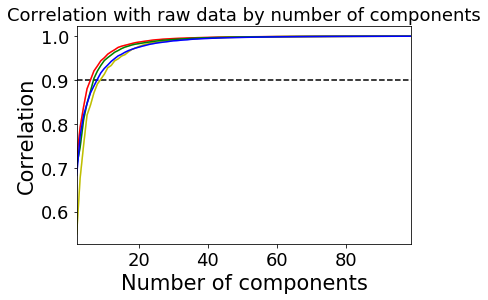

In [11]:

max_dims = len(intact['average'])
#max_dims = 40
colors=['r', 'y', 'g', 'b']
fig, ax = plt.subplots()
for i, c in enumerate(pieman_conds):
    print(i)
    sns.tsplot(data=pca_pd[c], time=[n for n in range(2, max_dims+2)], color=colors[i], err_style="unit_traces", ax=ax)
ax.set_title('Correlation with raw data by number of components')
ax.set_ylabel('Correlation')
ax.set_xlabel('Number of components')
plt.axhline(y=.9, c='k',linestyle='dashed',zorder=-1)
plt.show()

In [12]:
def mean_combine_try(vals):
    if not type(vals) in [list, np.ndarray]:
        return vals
    else:
        return np.mean(np.stack(vals, axis=2), axis=2)

In [15]:
nfolds=2
group_assignments = tc.helpers.get_xval_assignments(len(data), nfolds)

In [35]:
width = 5
laplace_params = {'scale': 100}
laplace = {'name': 'Laplace', 'weights': tc.laplace_weights, 'params': {'scale': width}}

In [44]:
laplace['params']

{'scale': 5}

In [46]:
from timecorr.helpers import isfc, mean_combine

level = 0
if type(level) is int:
    level = np.arange(level + 1)

level = np.ravel(level)

results_pd = pd.DataFrame()

for i in range(0, nfolds):

    in_raw = []
    out_raw = []

    in_data = [x for x in data[group_assignments == i]]
    out_data = [x for x in data[group_assignments != i]]
    
    in_fold_smooth = np.asarray(tc.timecorr([x for x in in_data], cfun=isfc,
                                             rfun=None, combine=mean_combine, weights_function=laplace['weights'],
                                             weights_params=laplace['params']))
    out_fold_smooth = np.asarray(tc.timecorr([x for x in out_data], cfun=None,
                                              rfun=None, combine=mean_combine, weights_function=laplace['weights'],
                                              weights_params=laplace['params']))


ValueError: all input arrays must have the same shape

In [ ]:

iter_results = tc.optimize_weighted_timepoint_decoder(data[conds == cond], nfolds=2, level=int(level),
                                    combine=corrmean_combine,
                                    cfun=eval(cfun),
                                    rfun=rfun,
                                    weights_fun=weights_paramter['weights'],
                                    weights_params=weights_paramter['params'])